In [1]:
import pandas as pd
df_reports = pd.read_pickle("reports_processed.pkl")
df_reports.head()

,publishedDate,targetPriceChange,bullets,recommendationId,total_text,prepped_total_text
0,2010-04-13 05:29:00+00:00,False,"[{'text': 'In the Q1 report and presentation, ...",0,"Key focus on ramp-up of FBR and Singapore, and...",key focus on ramp up of fbr and <country> and...
1,2010-04-19 07:31:00+00:00,False,[{'text': 'SAS has already released details of...,0,Pre-tax profit to balance around zero in March...,pre tax profit to balance around zero in <date...
2,2010-04-22 08:17:00+00:00,False,[{'text': 'SAS’s Q1 results were better than w...,0,Pre-tax profits of SEK 116m in March – we expe...,pre tax profits of <currency> <number> million...
3,2010-04-28 06:24:00+00:00,False,[{'text': 'REC’s Q1 EBITDA of NOK 415m came in...,0,"Q1 EBITDA of NOK 415m, 43% above our estimate ...",first quarter earnings before interest taxes ...
4,2010-04-28 07:05:00+00:00,False,[{'text': 'We expect Tikkurila revenues to gro...,0,We estimate Q1 revenue and EBIT growth on volu...,we estimate first quarter revenue and earnings...


In [2]:
df_reports.shape

(25618, 6)

In [3]:
df_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25618 entries, 0 to 25617
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   publishedDate       25618 non-null  datetime64[ns, UTC]
 1   targetPriceChange   25618 non-null  bool               
 2   bullets             25618 non-null  object             
 3   recommendationId    25618 non-null  int64              
 4   total_text          25618 non-null  object             
 5   prepped_total_text  25618 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 1.0+ MB


## Check cleaned

In [4]:
df_reports.isnull().sum()

publishedDate         0
targetPriceChange     0
bullets               0
recommendationId      0
total_text            0
prepped_total_text    0
dtype: int64

## show frequencies

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='recommendationId', ylabel='count'>

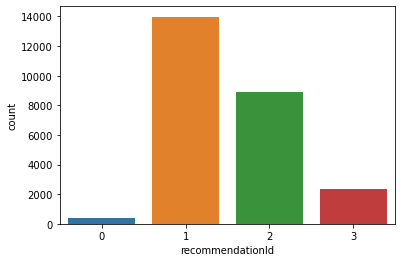

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df_reports['recommendationId'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='targetPriceChange', ylabel='count'>

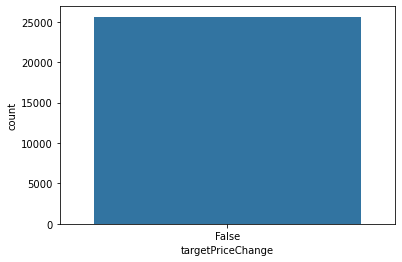

In [6]:
sns.countplot(df_reports['targetPriceChange'])

In [7]:
df_reports = df_reports[df_reports["recommendationId"] >= 1]
df_reports["recommendationId"] = df_reports["recommendationId"] - 1
df_reports.head()

,publishedDate,targetPriceChange,bullets,recommendationId,total_text,prepped_total_text
376,2010-03-01 06:23:00+00:00,False,[{'text': 'Golar LNG reported a Q4 2009 EBITDA...,0,Q4: Early Winter lifts EBIT. Golar LNG reporte...,fourth quarter early winter lifts earnings be...
377,2010-03-01 06:23:00+00:00,False,"[{'text': 'CTC Media, in which MTG owns 39%, r...",0,Significantly outpaced the Russian TV ad marke...,significantly outpaced the russian tv ad marke...
378,2010-03-01 09:25:00+00:00,False,[{'text': 'We expect BoConcept to slightly upg...,0,We believe an earnings upgrade is on the cards...,we believe an earnings upgrade is on the cards...
379,2010-03-01 10:26:00+00:00,False,[{'text': 'Questerre reported very good horizo...,0,First middle-Utica horizontal well exceeds all...,first middle utica horizontal well exceeds <cu...
380,2010-03-01 11:01:00+00:00,False,[{'text': 'Thrane & Thrane reported sales of D...,0,Guidance narrowed down as expected. Thrane & T...,guidance narrowed down as expected <company> ...


## Find the max length

In [8]:
L=df_reports.prepped_total_text.map(len)
L.describe()

count    25242.000000
mean      2096.045321
std        508.150317
min          0.000000
25%       1898.000000
50%       2079.000000
75%       2266.000000
max       7177.000000
Name: prepped_total_text, dtype: float64

<AxesSubplot:>

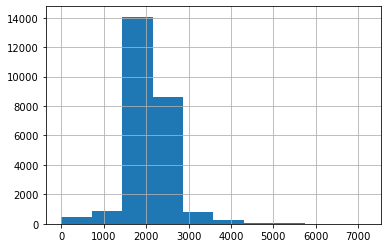

In [9]:
L.hist()

## Sample from data ID=0

In [10]:
tmp =df_reports.loc[df_reports.recommendationId==0,['prepped_total_text']].sample(5).values

for i in tmp:
    print(i[0][:123])
    print('__________________')

capital markets day event positive   much as expected  <company> capital markets day met our expectations and supported our
__________________
higher than expected light vehicle production in first quarter  <company> will release its first quarter <year> results on 
__________________
while we expect growth to accelerate in <country>  uncertainty prevails for h<number> <year> in <country> and the uk  howev
__________________
while <company> fourth quarter report added little clarity to the aml concerns  it did reduce our concerns about the risk o
__________________
second quarter earnings before interest  taxes  depreciation  and amortization in line with our and consensus forecasts  se
__________________


## Sample from data ID=1

In [11]:
tmp =df_reports.loc[df_reports.recommendationId==1,['prepped_total_text']].sample(5).values

for i in tmp:
    print(i[0][:123])
    print('__________________')

<company> details <percent> year over year sales decline  ex forex  in third quarter  <company> third quarter results are d
__________________
estimates  target price and recommendation up  <company> third quarter report included both negatives and positives  it dis
__________________
astra finally reported an earnings miss in fourth quarter  bringing up core earnings per share for the year  barely  within
__________________
growth in second quarter boosted by o kilo and football  but without operating leverage  we expect good results for <compan
__________________
sale of entire <percent> avito stake main take from third quarter report  in conjunction with its third quarter report  <co
__________________


## Sample from data ID=2

In [12]:
tmp =df_reports.loc[df_reports.recommendationId==2,['prepped_total_text']].sample(5).values

for i in tmp:
    print(i[0][:300])
    print('__________________')

dividend freeze for two years is base case  <company> has recommended cutting its <year> divided to zero  driven by what we now see as the risk of more of the fleet being without contract through <year> and <year>  together with a historical practice of solid financial headroom  we have also set the
__________________
pd acquisitions a concern  from fourth quarter <year> to third quarter <year>  <company> justitia managed to invest as much as <currency> <number> billion in purchased debt  pd   mainly in small and medium sized portfolios  since then  the rolling <number> months investment level has declined to a n
__________________
capital markets presentation at astro with focus on unity  <company> hosted a capital markets presentation at the industry conference astro in san diego on <date>  as we had expected  one of the main focus points of the presentation was mr linac unity  which is in development  there is clear potenti
__________________
the order intake was lower than we expec

In [13]:
from wordcloud import WordCloud
from textwrap import wrap
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2",collocations=False).generate(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()


## wordcloud

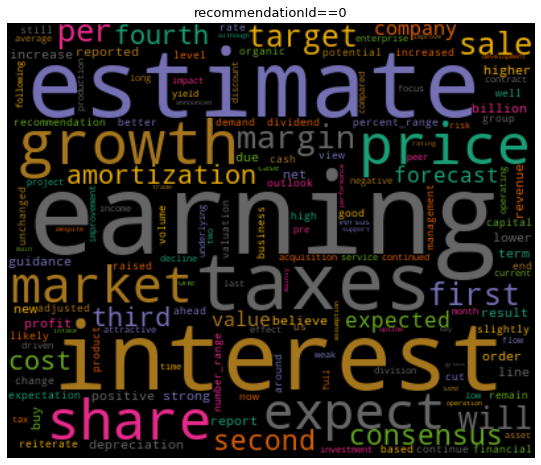

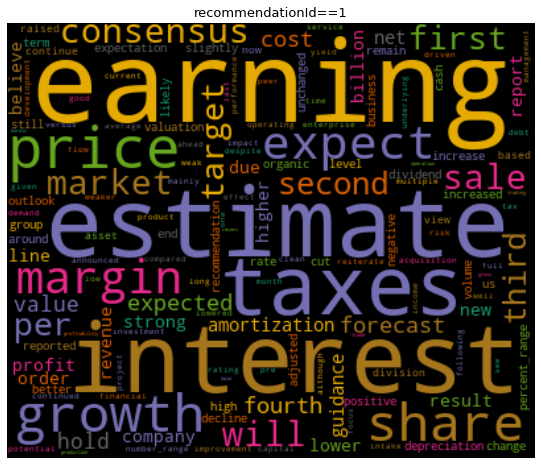

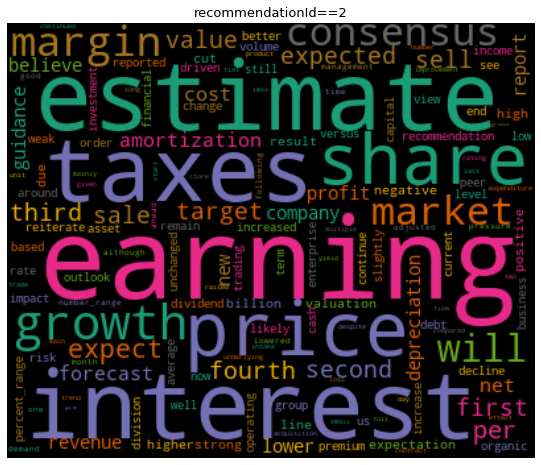

In [14]:
import re
r = '<.{1,10}>|million|year|quarter'
for i in range(3):
    tmp = df_reports.loc[df_reports.recommendationId==i,['prepped_total_text']]
    words=tmp.prepped_total_text.str.cat(sep=' ')
    words=re.sub(r,'',words)
    generate_wordcloud(words,"recommendationId==%d"%i)